In [1]:
import numpy as np
import xarray as xr
import os
import sys
sys.path.append("../")
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau

from src.data_utils import *        
from src.vae_model import *
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

### TODO: Scale data!!

In [3]:
data_dir = "../data/"
batch_size = 32
chl_data = torch.load(data_dir + "chl_train_channels_2000_2022.pt")

In [32]:
chl_data[0][0].shape

torch.Size([10, 176, 240])

In [5]:
frac_train = 0.8
n_train = int(np.ceil(frac_train * len(chl_data)))
n_test = len(chl_data) - n_train
train_set, test_set = random_split(chl_data, [n_train, n_test])

In [33]:
train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=True,
)

In [39]:
x = next(iter(train_loader))[0]

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [48]:
checkpoint = torch.load(
    "../saved_models/checkpoints/vae/best_vae.pt",
    map_location=lambda storage, loc: storage.cuda(0),
    weights_only=True,
)

In [49]:
model = ConvVAE(input_channels=10, latent_dim=40).to(device)

In [51]:
model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [54]:
x = x.to(device)

In [56]:
with torch.no_grad():
    xhat, mu, logvar = model(x)

In [58]:
xhat = xhat.detach().cpu().numpy()

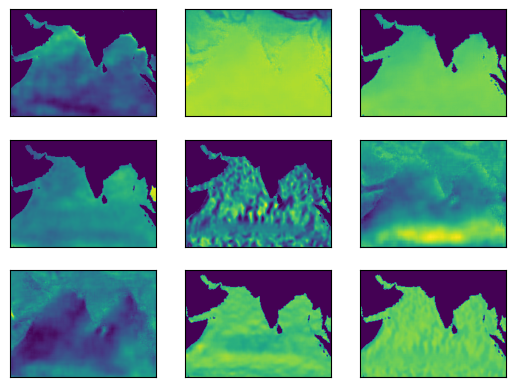

In [67]:
plot_channels(xhat, clim=False)

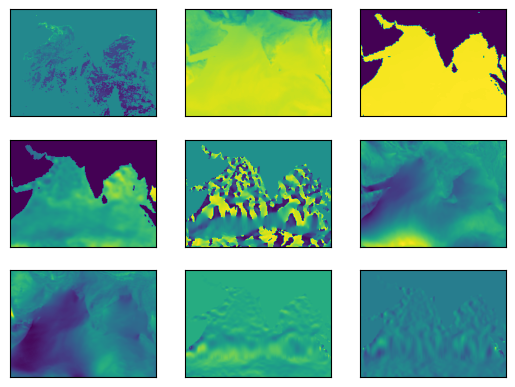

In [68]:
plot_channels(x.cpu(), batch_ind=0, clim=False)

In [89]:
torch.min(x), torch.min(out)

(tensor(-179.9998, device='cuda:0'), tensor(0.))

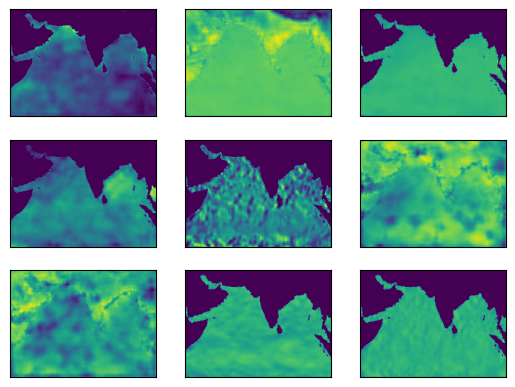

In [86]:
z = torch.randn(batch_size, 40).to(device)
with torch.no_grad():
    out = model.decoder(z).detach().cpu()
plot_channels(
    out,
    clim=False,
)